In [1]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.pyplot import figure

# Options set
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 0)

# Default theme for matplotlib set
sns.set_theme()

In [3]:

engine = sa.create_engine('mssql://GBWADJ8HJ293/LIMS?driver=SQL+Server+Native+Client+10.0?trusted_connection=yes')


#df=pd.read_sql("SELECT * FROM TRIAL WHERE Lot= 'PR18900' AND Pallet=1", engine)
# df=pd.read_sql("SELECT * FROM TRIAL WHERE Product='SORB-AC43'", engine)
df=pd.read_sql("SELECT * FROM TRIAL", engine)


# df_ele=df[["Al2O3_TM01a", "Fe_TM01a", "As_TM01a", "Pb_TM01a", "Cd_TM01a", "Sb_TM01a", "THM_TM20a", "Hg_TM20a" ]]
# df_date=df["Date"]
df

,Product,Date,Lot,Pallet,Appearance,APS_d50,D90,Loss_at_1000,Loss_USP_Dental,Loss_at_105,Loss_at_145,pH_5,Harrison_Equivalent,Y_Lightness,colour,Tapped_Bulk_Density,Oil_Adsorption_Linseed,_45µm_Wet_sieve,Perspex_Abrasion_Value,F_COMP,F_PPM,CL_PERCENT,SO4,Water_solubles,SiO2_by_XRF,Al2O3_TM01a,Fe_TM01a,As_TM01a,Pb_TM01a,Cd_TM01a,Sb_TM01a,THM_TM20a,TVC,TFC_Moulds_and_Yeasts,Staphylococcus_aureaus,E_coli,Pseudomonas_spp,D10,_250_Wet_Sieve,Foreign_Bodies,SO4_CL,Hg_TM20a,Cd_TM21,Cr_TM21,Co_TM21,Ni_TM21,Sb_TM21,Candida_albicans,Bile_tolerant_gram_negative_organisms,_45_m_Wet_sieve,Sodium_Sulphate,Transmission_1_437_RI,Transmission_1_443_RI,Solution_1_RI,Solution_1_Tr,Solution_2_RI,Solution_2_Tr,Solution_3_RI,Solution_3_Tr,Solution_4_RI,Solution_4_Tr,Peak_RI,Peak_Tr,BDL,Oil_Adsorption_GSK,Einlhener_Abrasion_Value,Oil_Absorption,Transmission_1_446_RI,Transmission_1_454_RI,Ganz_Whiteness,_45µm_Wet_sieve1,CVP_3_95_microns,Sodium_Chloride,NACL_NA2SO4,Assay,Al2O3_TM01g,Mg_TM01a,Co_TM01a,Cr_TM01a,Ni_TM01a,V_TM01a,QBT_Water_Absorption,Transmission_1_448_RI,Viscosity_10_Slurry,Transmission_1_440_RI,_106_710_fraction,_710µm_Dry_sieve,_106_micron_Dry_sieve,Foreign_Bodies_Dry_method,Na2O,Loss_USP,Lightness,MAT_60,MAT_85,HEGMAN,COMMENT,OSP,Soluble_Ionisable_Salts,D99,Pore_Volume_Nitrogen,Carbon,calcium,FTIR_Identity,L,A,B,CIE94_deltaE,Colour_Bleed,_710_m_Dry_sieve,_0_500_mm_Dry_sieve,_180_m_dry_sieve,_106_m_Dry_sieve,_850_micron_dry_sieve
0,SORB-AC23,2018-01-13 13:45:00,MR18951,1,PASS,2.380000114,4.090000153,6.800000191,5.699999809,1.100000024,None,7.300000191,100,92.55000305,100,386,68,0.001,9.899999619,96,<8,0.01,0.050000001,0.379999995,99.19999695,799,257,0.02,0.100000001,None,None,2.089999914,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,SORB-AC23,2018-01-13 15:00:00,MR18951,1,None,2.289999962,3.920000076,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,SORB-AC23,2018-01-13 17:00:00,MR18951,2,None,2.299999952,3.920000076,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,SORB-AC23,2018-01-13 19:00:00,MR18951,3,None,2.25999999,3.890000105,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,SORB-AC23,2018-01-13 21:00:00,MR18951,4,None,2.279999971,3.910000086,None,None,None,None,None,None,None,N

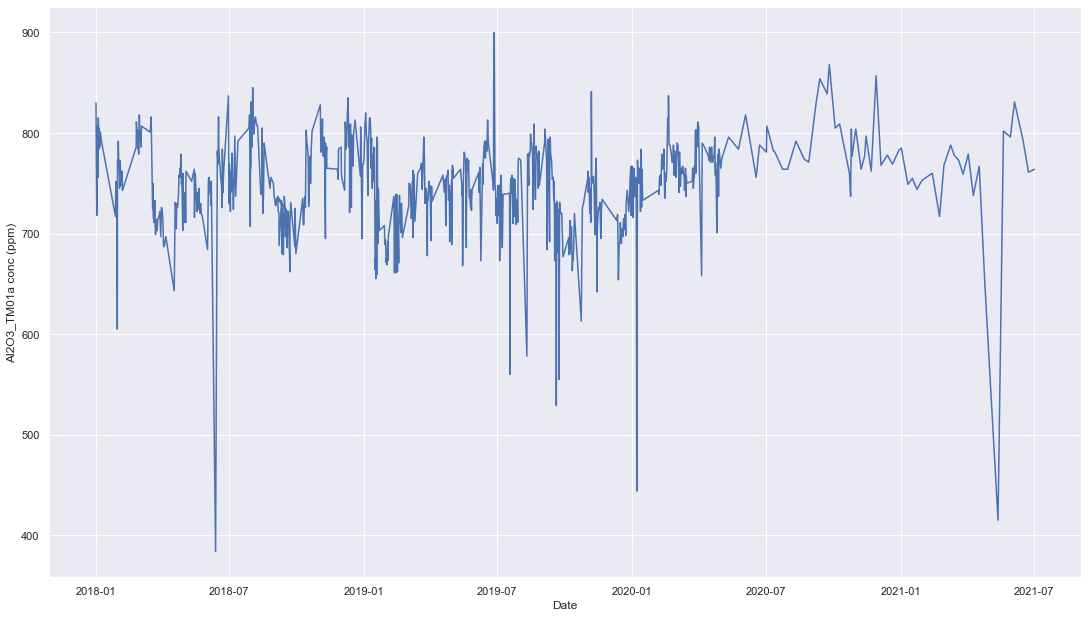

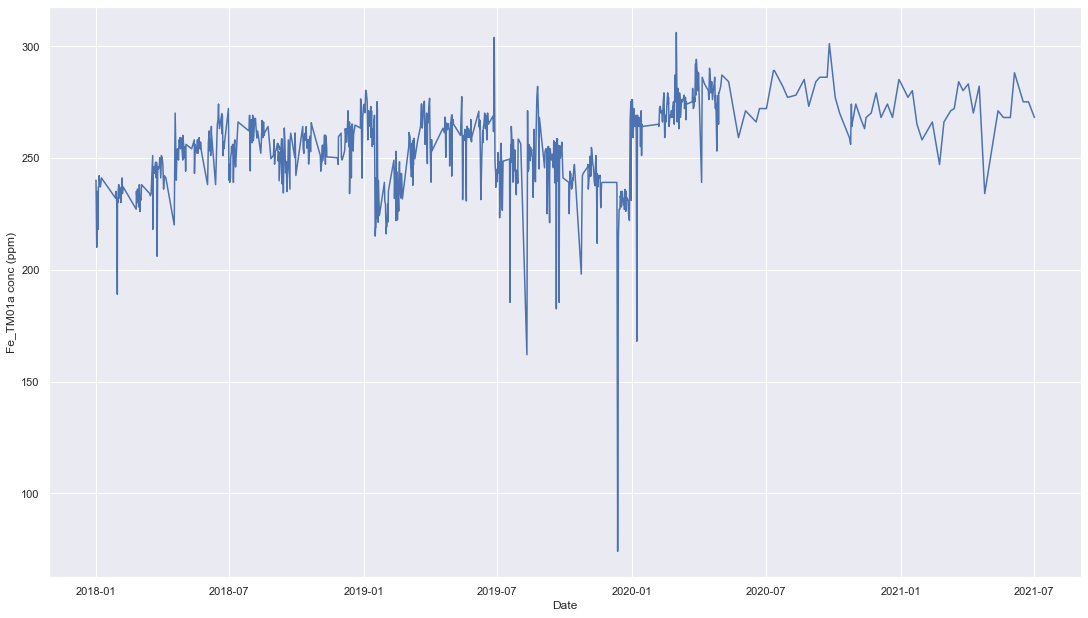

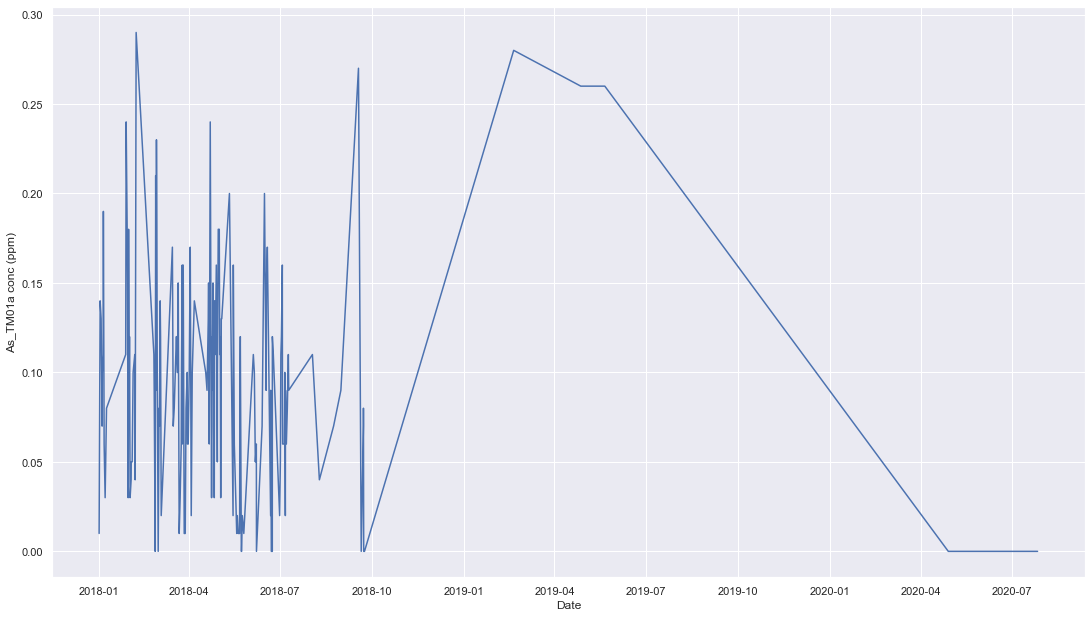

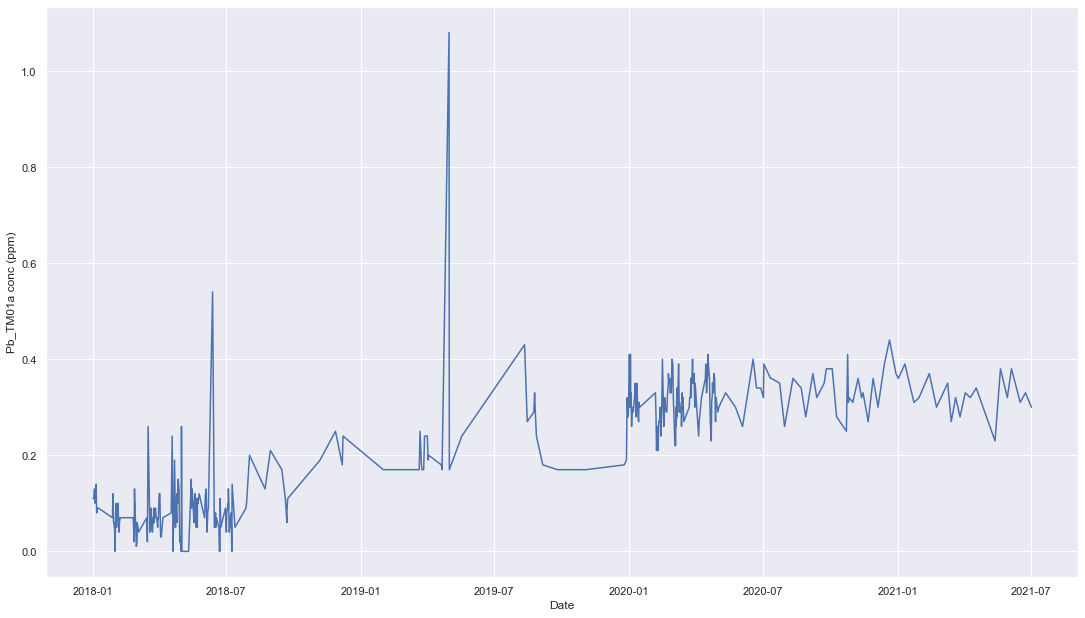

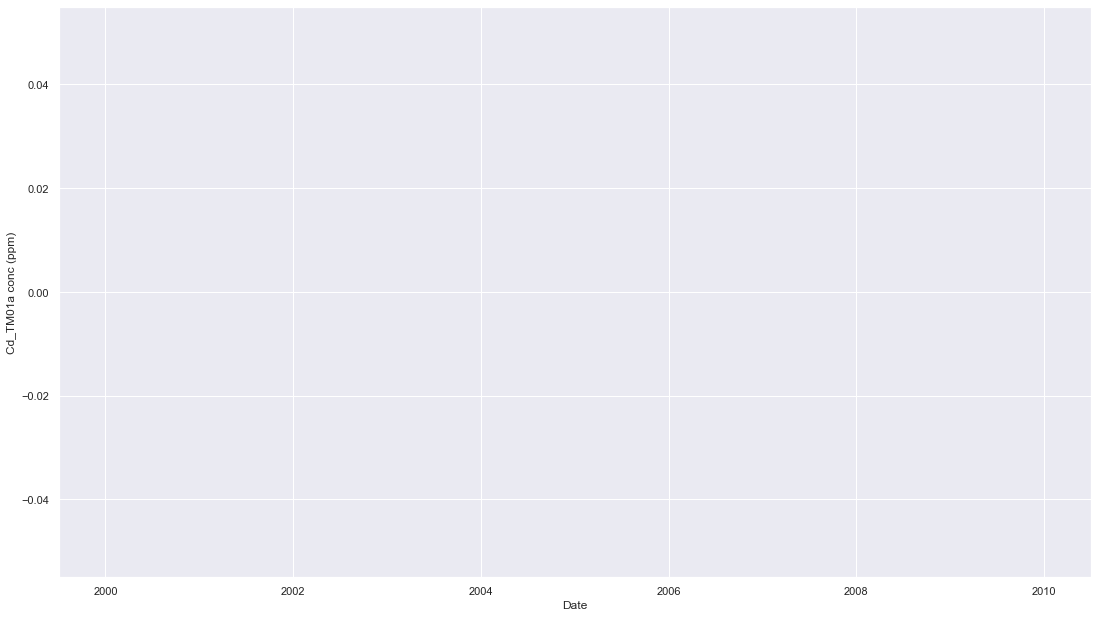

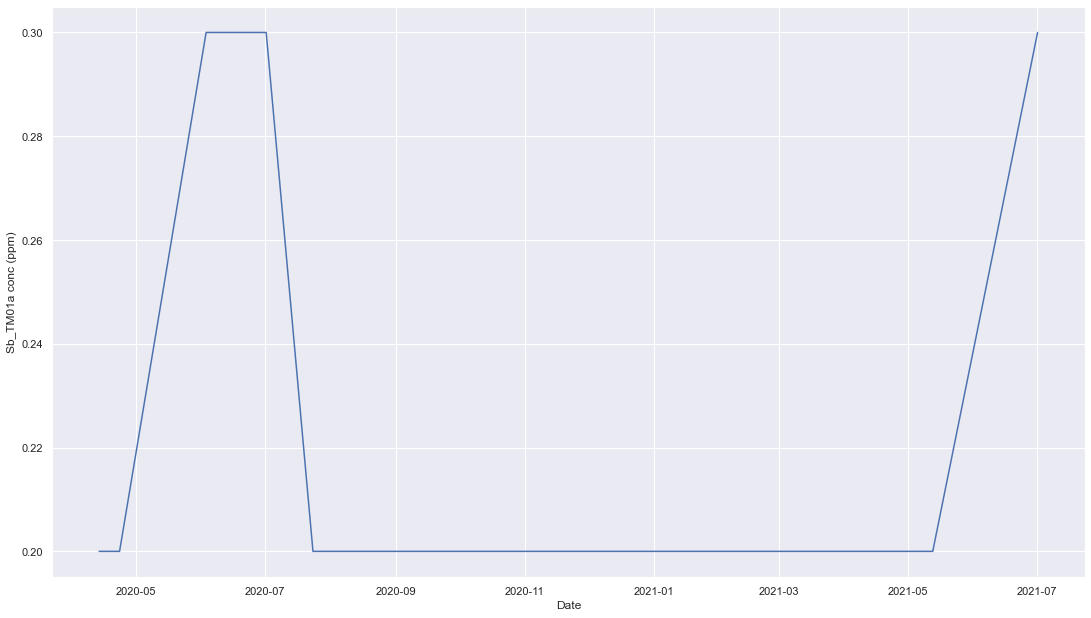

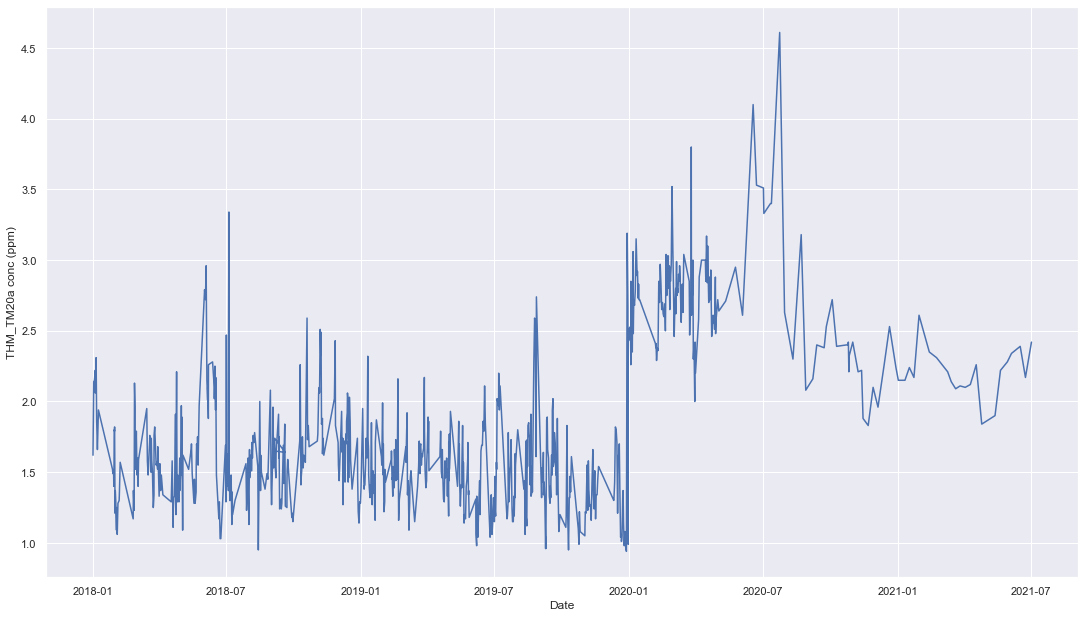

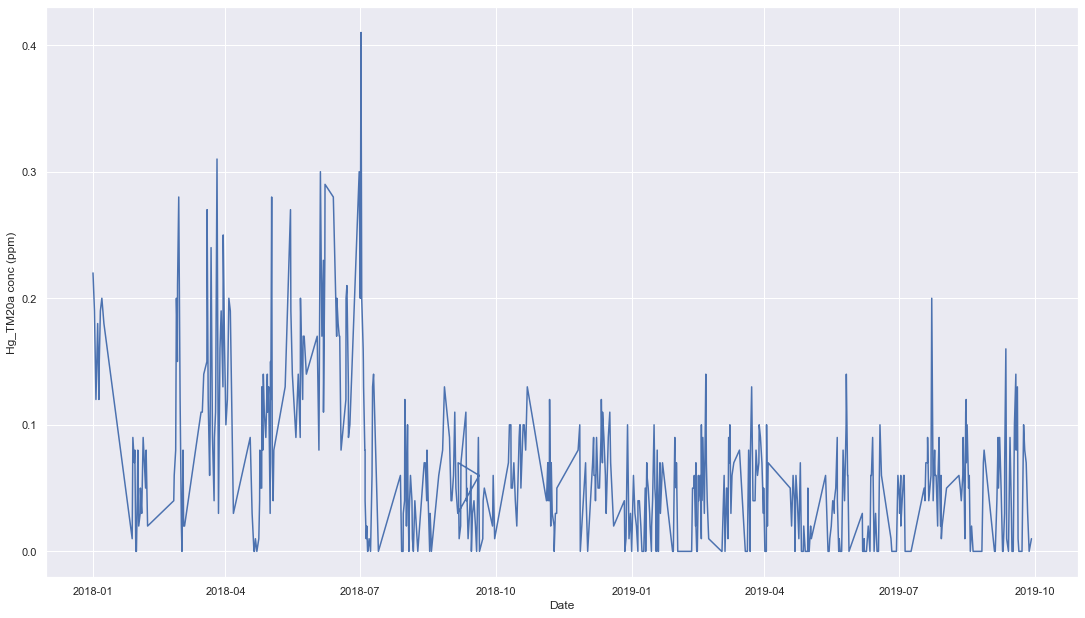

In [63]:
for c in df_ele:
    df=pd.concat([df_date,df_ele[c]], join="outer", axis=1)
    df[c]=pd.to_numeric(df[c], errors="coerce")
    df.dropna(subset=[c], inplace=True)
    fig, ax =plt.subplots()
    plt.plot(df["Date"], df[c])
    plt.xlabel("Date")
    plt.ylabel(c + " conc (ppm)")
    fig.set_size_inches(18.5, 10.5, forward=True)
#     fig.savefig( c + ".png", dpi=fig.dpi)

In [59]:
#     df=pd.concat([df_whole["Date"]], df)
#     df.dropna(subset=[c], inplace=True)
#     df[c]=pd.to_numeric(df[c])
#     